# Lab 4: Fuzzy Foundations & Visualisation

**Module:** Artificial Intelligence  
**Topic:** Fuzzy Logic – Part 1  

---

## Learning Objectives

By the end of this lab, you will be able to:

1. **Define and plot common membership functions**  
    - Triangular  
    - Trapezoidal  
    - Gaussian  
    - Sigmoid

2. **Compute membership degrees for crisp inputs**

3. **Implement fuzzy hedges from scratch and visualise their effect on membership functions**

4. **Apply fuzzy set operations:**  
    - AND (min)  
    - OR (max)  
    - NOT (complement)  
    - Probabilistic OR

5. **Fuzzify crisp inputs for the dapping example**

## Setup

Run the cell below to import the required libraries.  
We use **scikit-fuzzy** for its convenient membership function generators and **matplotlib** for plotting.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## 1. Crisp Sets vs. Fuzzy Sets

In classical (Boolean) set theory, an element either belongs to a set or it doesn't. The characteristic function of a crisp set **A** maps elements from a universe of discourse **X** to \{0, 1\}:

$$
f_A(x) : X \to \{0,1\}, \qquad
f_A(x) =
\begin{cases}
1 & if & x \in A,\\[6pt]
0 & if & x \notin A.
\end{cases}
$$

A fuzzy set generalises this by allowing partial membership. The membership function $\mu_A(x)$ maps elements to the continuous range $[0,1]$:

$$
\mu_A(x) : X \to [0,1].
$$

The universe of discourse is the range of all possible values for a chosen variable (for example, human height in cm).

### Exercise 1.1: Crisp vs. Fuzzy Tallness

The slides show crisp and fuzzy sets for tallness. The universe of discourse for height ranges from 150 cm  
to 210 cm.

Task: Plot a crisp set where "tall" means height ≥ 180 cm (Boolean boundary), and then plot a fuzzy  
version where tallness is a gradual transition. Use the following triangular fuzzy sets:

- Short: Triangle(150, 150, 175)  
- Average: Triangle(160, 175, 190)  
- Tall: Triangle(180, 200, 210)

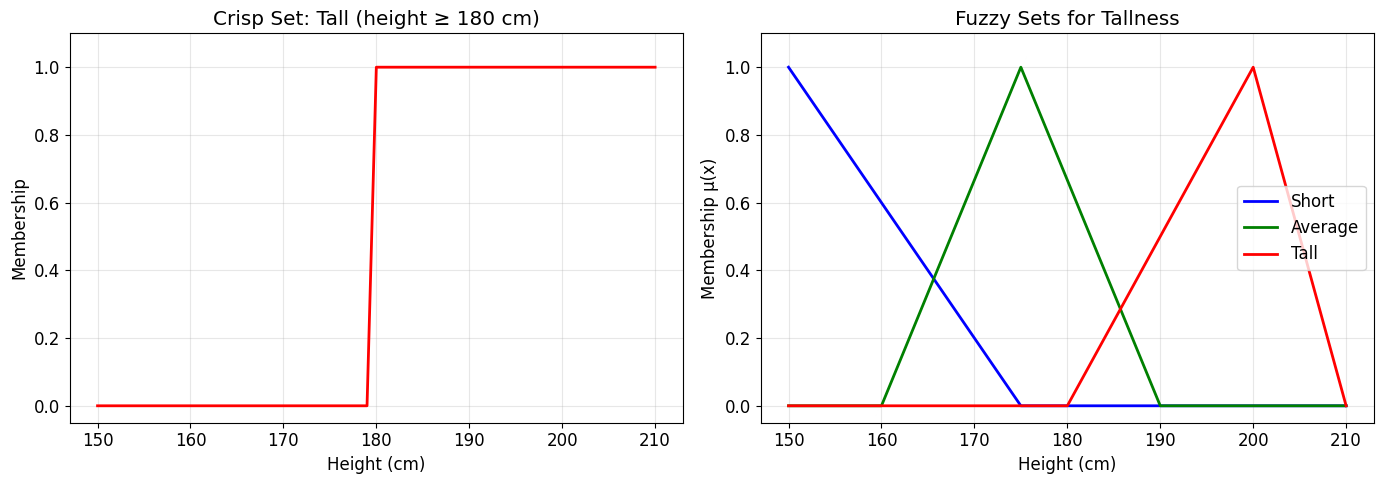

A person who is 184 cm tall:
 μ_average(184) = 0.40
 μ_tall(184) = 0.20
 → Partial membership in MULTIPLE sets simultaneously.


In [2]:
# Universe of discourse: height in cm
x_height = np.arange(150, 211, 1)

# --- Crisp set: tall if height >= 180 ---
crisp_tall = np.where(x_height >= 180, 1.0, 0.0)

# --- Fuzzy sets ---
short = fuzz.trimf(x_height, [150, 150, 175])

# TODO: create here the "average" and "tall" sets

# Average
average = fuzz.trimf(x_height, [160, 175, 190])

# Tall
tall = fuzz.trimf(x_height, [180, 200, 210])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crisp
ax1.plot(x_height, crisp_tall, 'r-', linewidth=2)
ax1.set_title('Crisp Set: Tall (height ≥ 180 cm)')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Membership')
ax1.set_ylim(-0.05, 1.1)

# Fuzzy
ax2.plot(x_height, short, 'b-', linewidth=2, label='Short')
ax2.plot(x_height, average, 'g-', linewidth=2, label='Average')
ax2.plot(x_height, tall, 'r-', linewidth=2, label='Tall')
ax2.set_title('Fuzzy Sets for Tallness')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Membership μ(x)')
ax2.set_ylim(-0.05, 1.1)
ax2.legend()
plt.tight_layout()
plt.show()

# Demonstrate partial membership
height = 184
mu_avg = fuzz.interp_membership(x_height, average, height)

# TODO: compute here the membership value for "tall"
mu_tall = fuzz.interp_membership(x_height, tall, height)

print(f"A person who is {height} cm tall:")
print(f" μ_average({height}) = {mu_avg:.2f}")
print(f" μ_tall({height}) = {mu_tall:.2f}")
print(f" → Partial membership in MULTIPLE sets simultaneously.")

## 2. Common Membership Functions
The shape of a membership function determines how elements map to degrees of membership. The
most common types are:

### Exercise 2.1: Plot All Four Membership Function Types

**Task**: Using a universe of discourse from 0 to 10, create and plot one example of each membership
function type. Choose parameters that make the differences visually clear.

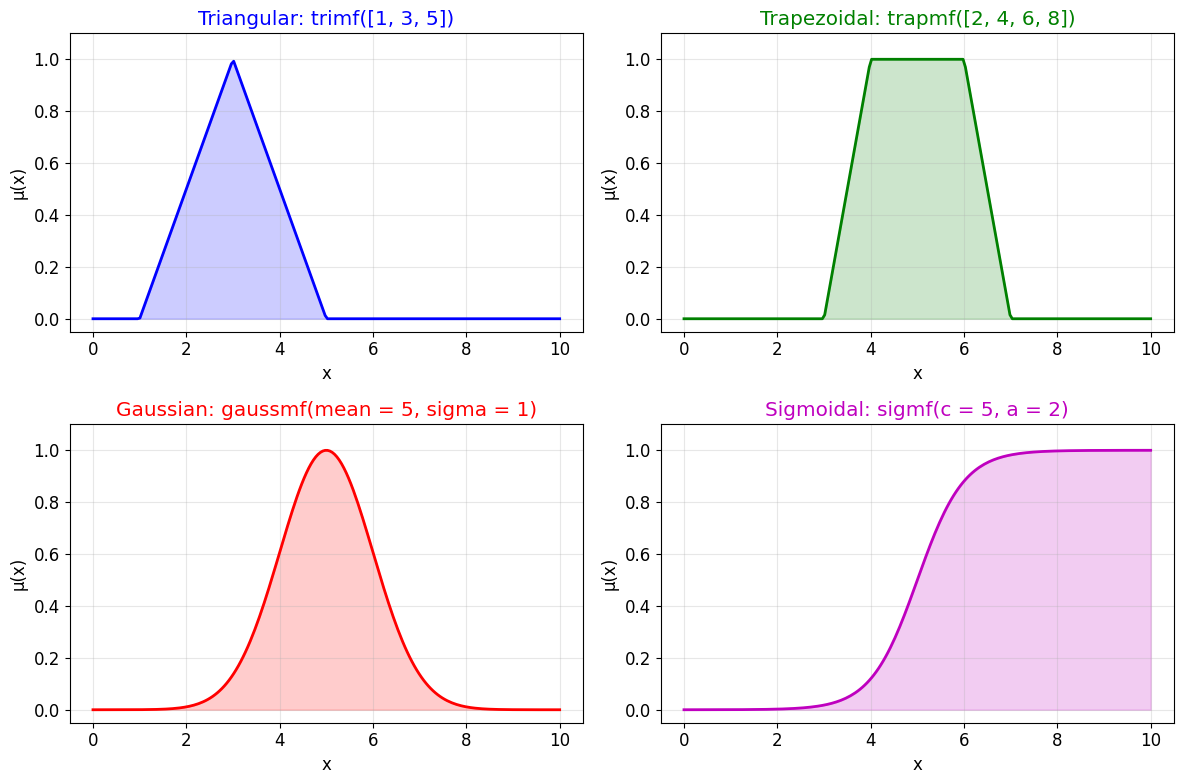

In [3]:
x = np.linspace(0, 10, 200)

# Triangular: peak at 3
# TODO: create here a triangular membership function
mf_tri = fuzz.trimf(x, [1, 3, 5])

# Trapezoidal: plateau from 4 to 6
# TODO: create here a trapezoidal membership function
mf_trap = fuzz.trapmf(x, [3, 4, 6, 7])

# Gaussian: centred at 5, sigma=1
# TODO: create here a gaussian membership function
mf_gauss = fuzz.gaussmf(x, 5, 1)

# Sigmoid: inflection at 5, slope=2 (positive = rising)
# TODO: create here a sigmoidal membership function
mf_sigmoid = fuzz.sigmf(x, 5, 2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(x, mf_tri, 'b-', linewidth=2)
axes[0, 0].set_title('Triangular: trimf([1, 3, 5])', color='b')
axes[0, 0].fill_between(x, mf_tri, alpha=0.2, color='b')

# TODO: code here to visualise the other 3 membership functions
axes[0, 1].plot(x, mf_trap, 'g-', linewidth=2)
axes[0, 1].set_title('Trapezoidal: trapmf([2, 4, 6, 8])', color='g')
axes[0, 1].fill_between(x, mf_trap, alpha=0.2, color='g')

axes[1, 0].plot(x, mf_gauss, 'r-', linewidth=2)
axes[1, 0].set_title('Gaussian: gaussmf(mean = 5, sigma = 1)', color='r')
axes[1, 0].fill_between(x, mf_gauss, alpha=0.2, color='r')

axes[1, 1].plot(x, mf_sigmoid , 'm-', linewidth=2)
axes[1, 1].set_title('Sigmoidal: sigmf(c = 5, a = 2)', color='m')
axes[1, 1].fill_between(x, mf_sigmoid, alpha=0.2, color='m')

for ax in axes.flat:
 ax.set_xlabel('x')
 ax.set_ylabel('μ(x)')
 ax.set_ylim(-0.05, 1.1)

plt.tight_layout()
plt.show()

### Exercise 2.2: The Dapping Example — Defining Linguistic Variables

Dapping is a traditional form of fly fishing common in the west of Ireland (Lough Corrib, Lough Mask, Lough Conn, etc.). It involves impaling a live insect on a hook and letting the wind carry it across the water to tempt a trout. Success depends on wind and temperature: too calm and nothing happens, too stormy and you lose control.

**Task**

- Define and plot all three linguistic variables and their fuzzy sets.

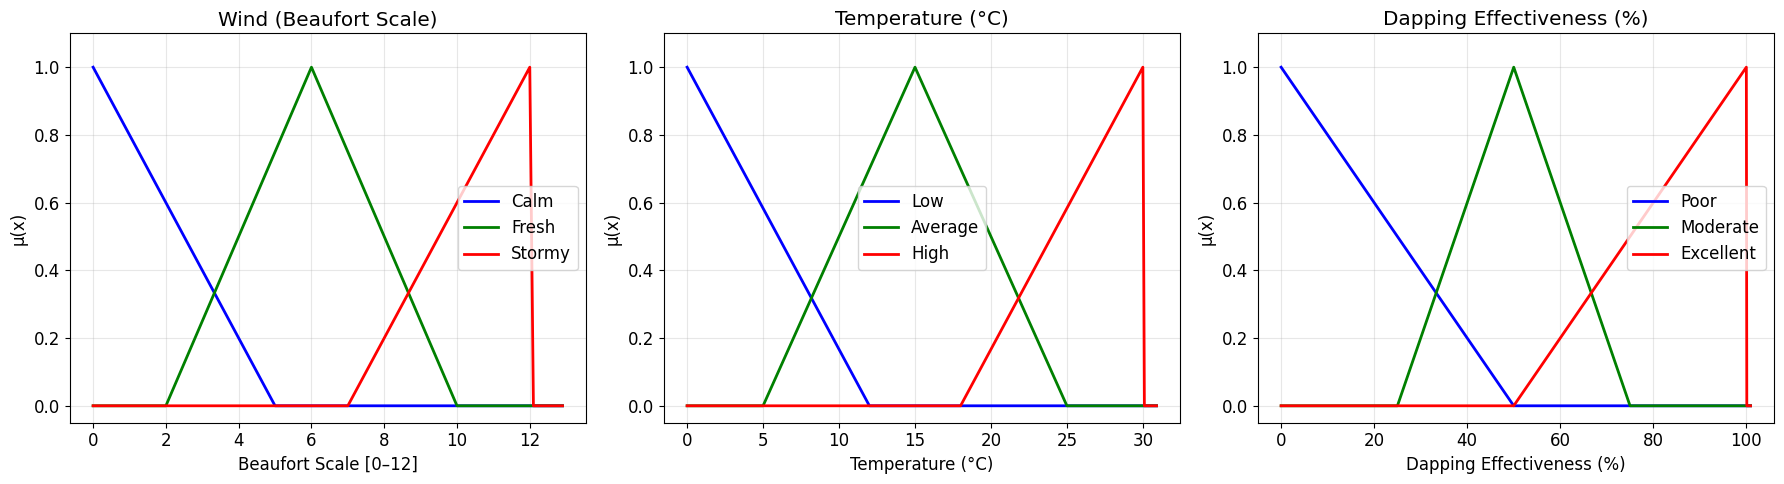

In [4]:
# --- Define universes of discourse ---
x_wind = np.arange(0, 13, 0.1) # Beaufort scale 0-12

# TODO: code here the universes of discurse for
# temperature and dapping effectiveness
x_temp = np.arange(0, 31, 0.1) # Temperature in Celsius
x_dap = np.arange(0, 101, 0.1) # Dapping effectiveness in percentage

# --- Wind membership functions ---
wind_calm = fuzz.trimf(x_wind, [0, 0, 5])
wind_fresh = fuzz.trimf(x_wind, [2, 6, 10])
wind_stormy = fuzz.trimf(x_wind, [7, 12, 12])

# --- Temperature membership functions ---
# TODO: code the temperature membership functions here
temp_cold = fuzz.trimf(x_temp, [0, 0, 12])
temp_mild = fuzz.trimf(x_temp, [5, 15, 25])
temp_hot = fuzz.trimf(x_temp, [18, 30, 30])

# --- Dapping membership functions ---
# TODO: code the dapping membership functions here
dapp_ineffective = fuzz.trimf(x_dap, [0, 0, 50])
dapp_moderate = fuzz.trimf(x_dap, [25, 50, 75])
dapp_effective = fuzz.trimf(x_dap, [50, 100, 100])

# --- Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Wind
ax1.plot(x_wind, wind_calm, 'b-', linewidth=2, label='Calm')
ax1.plot(x_wind, wind_fresh, 'g-', linewidth=2, label='Fresh')
ax1.plot(x_wind, wind_stormy, 'r-', linewidth=2, label='Stormy')
ax1.set_title('Wind (Beaufort Scale)')
ax1.set_xlabel('Beaufort Scale [0–12]')
ax1.set_ylabel('μ(x)')
ax1.legend()

# Temperature
# TODO: code here the figure for temperature
ax2.plot(x_temp, temp_cold, 'b-', linewidth=2, label='Low')
ax2.plot(x_temp, temp_mild, 'g-', linewidth=2, label='Average')
ax2.plot(x_temp, temp_hot, 'r-', linewidth=2, label='High')
ax2.set_title('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('μ(x)')
ax2.legend()

# Dapping
# TODO: code here the figure for dapping
ax3.plot(x_dap, dapp_ineffective, 'b-', linewidth=2, label='Poor')
ax3.plot(x_dap, dapp_moderate, 'g-', linewidth=2, label='Moderate')
ax3.plot(x_dap, dapp_effective, 'r-', linewidth=2, label='Excellent')
ax3.set_title('Dapping Effectiveness (%)')
ax3.set_xlabel('Dapping Effectiveness (%)')
ax3.set_ylabel('μ(x)')
ax3.legend()

for ax in [ax1, ax2, ax3]:
 ax.set_ylim(-0.05, 1.1)
plt.tight_layout()
plt.show()

### Exercise 2.3: Computing Membership Degrees

Given crisp inputs, fuzzification determines the degree of membership in each fuzzy set.  

**Task:** For the inputs wind = 8 (Beaufort) and temperature = 10°C, compute the membership degree in every fuzzy set:
- wind\_calm, wind\_fresh, wind\_stormy
- temp\_cold, temp\_mild, temp\_hot

*Note: The exact membership values depend on the precise triangle coordinates, which are read from the handout diagrams. The triangles we defined above are a close but imperfect approximation of those diagrams.*


In [5]:
# Crisp inputs
wind_val = 8
temp_val = 10

# Fuzzify wind
mu_calm = fuzz.interp_membership(x_wind, wind_calm, wind_val)
mu_fresh = fuzz.interp_membership(x_wind, wind_fresh, wind_val)
mu_stormy = fuzz.interp_membership(x_wind, wind_stormy, wind_val)

# Fuzzify temperature
# TODO: code the temperature fuzzification here
mu_low = fuzz.interp_membership(x_temp, temp_cold, temp_val)
mu_average = fuzz.interp_membership(x_temp, temp_mild, temp_val)
mu_high = fuzz.interp_membership(x_temp, temp_hot, temp_val)

print(f"Fuzzification for wind = {wind_val}, temperature = {temp_val}")
print(f"{'─' * 45}")
print(f" μ_calm({wind_val}) = {mu_calm:.4f}")
print(f" μ_fresh({wind_val}) = {mu_fresh:.4f}")
print(f" μ_stormy({wind_val}) = {mu_stormy:.4f}")
print()
print(f" μ_low({temp_val}) = {mu_low:.4f}")
print(f" μ_average({temp_val}) = {mu_average:.4f}")
print(f" μ_high({temp_val}) = {mu_high:.4f}")

Fuzzification for wind = 8, temperature = 10
─────────────────────────────────────────────
 μ_calm(8) = 0.0000
 μ_fresh(8) = 0.5000
 μ_stormy(8) = 0.2000

 μ_low(10) = 0.1667
 μ_average(10) = 0.5000
 μ_high(10) = 0.0000
